# PCA Implementation on the [Mushroom classification](https://www.kaggle.com/uciml/mushroom-classification) dataset
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (3 July 2020)

##### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import dabl

import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
# Read the downloaded data from PC
dataset=pd.read_csv('mushroom dataset.csv')
print(dataset.shape)

(8124, 23)


In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#Describe the dataset

dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data=dataset.apply(le.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


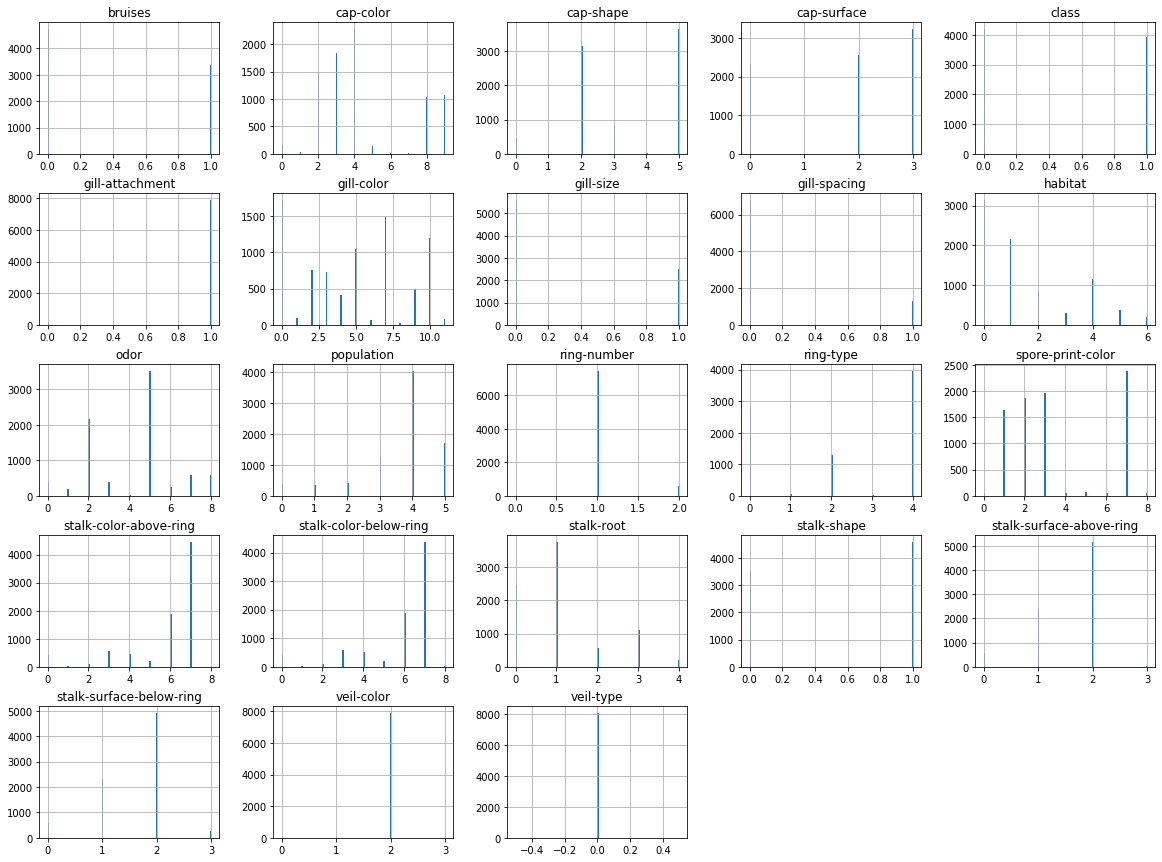

In [7]:
data.hist(bins=100, figsize=(20,15))

plt.show()

Target looks like classification
Linear Discriminant Analysis training set score: 0.658


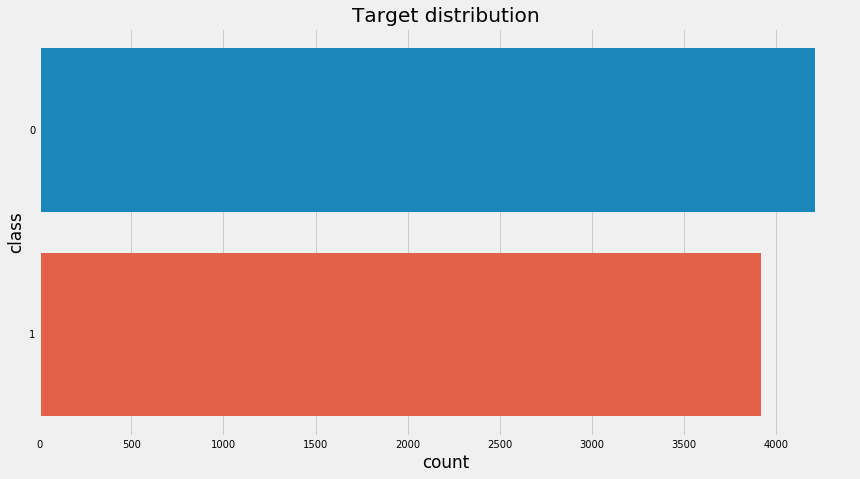

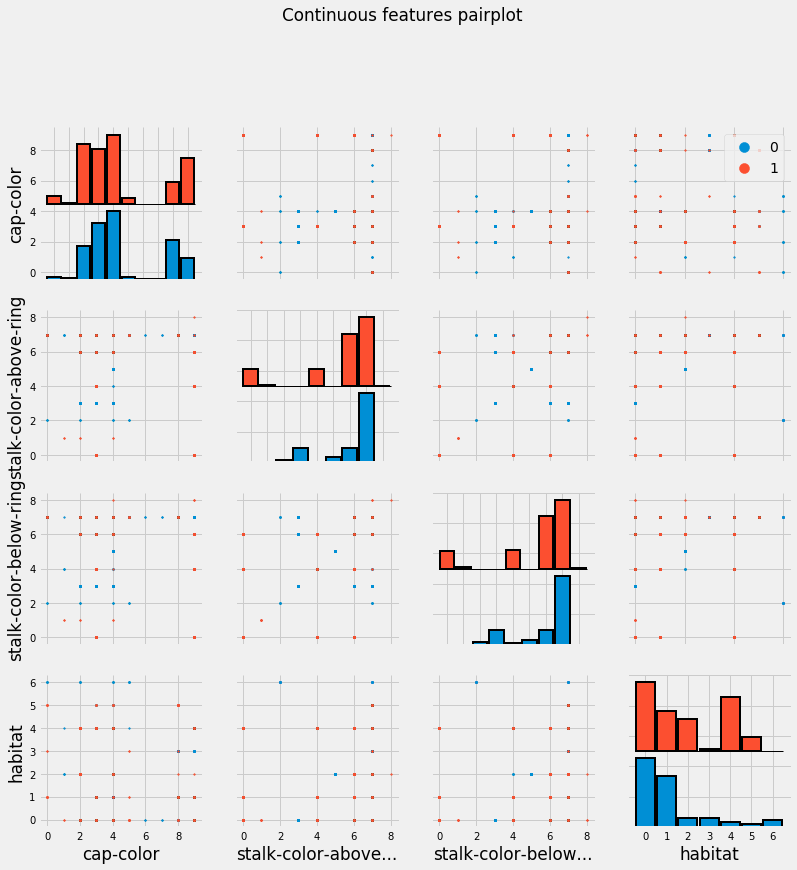

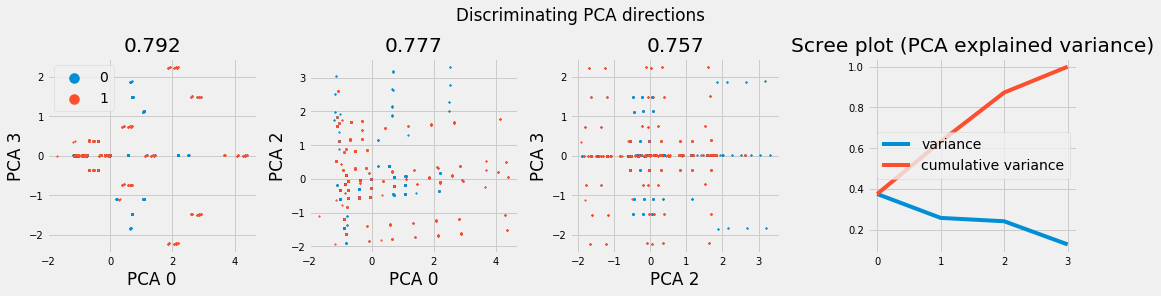

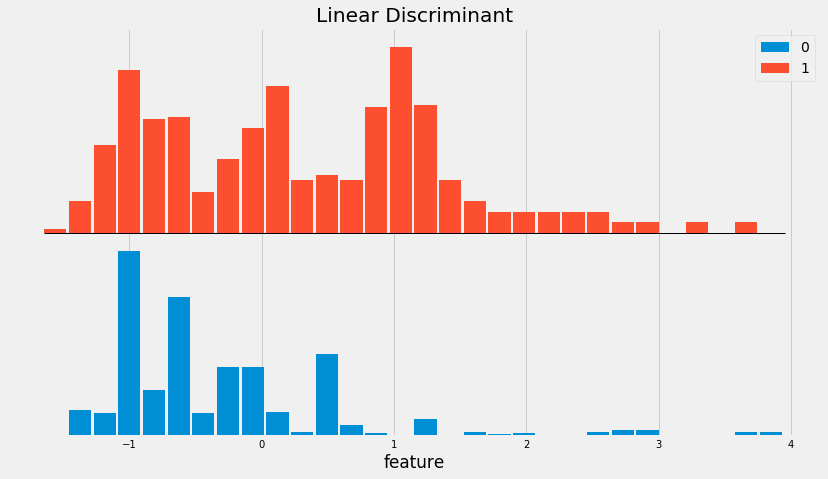

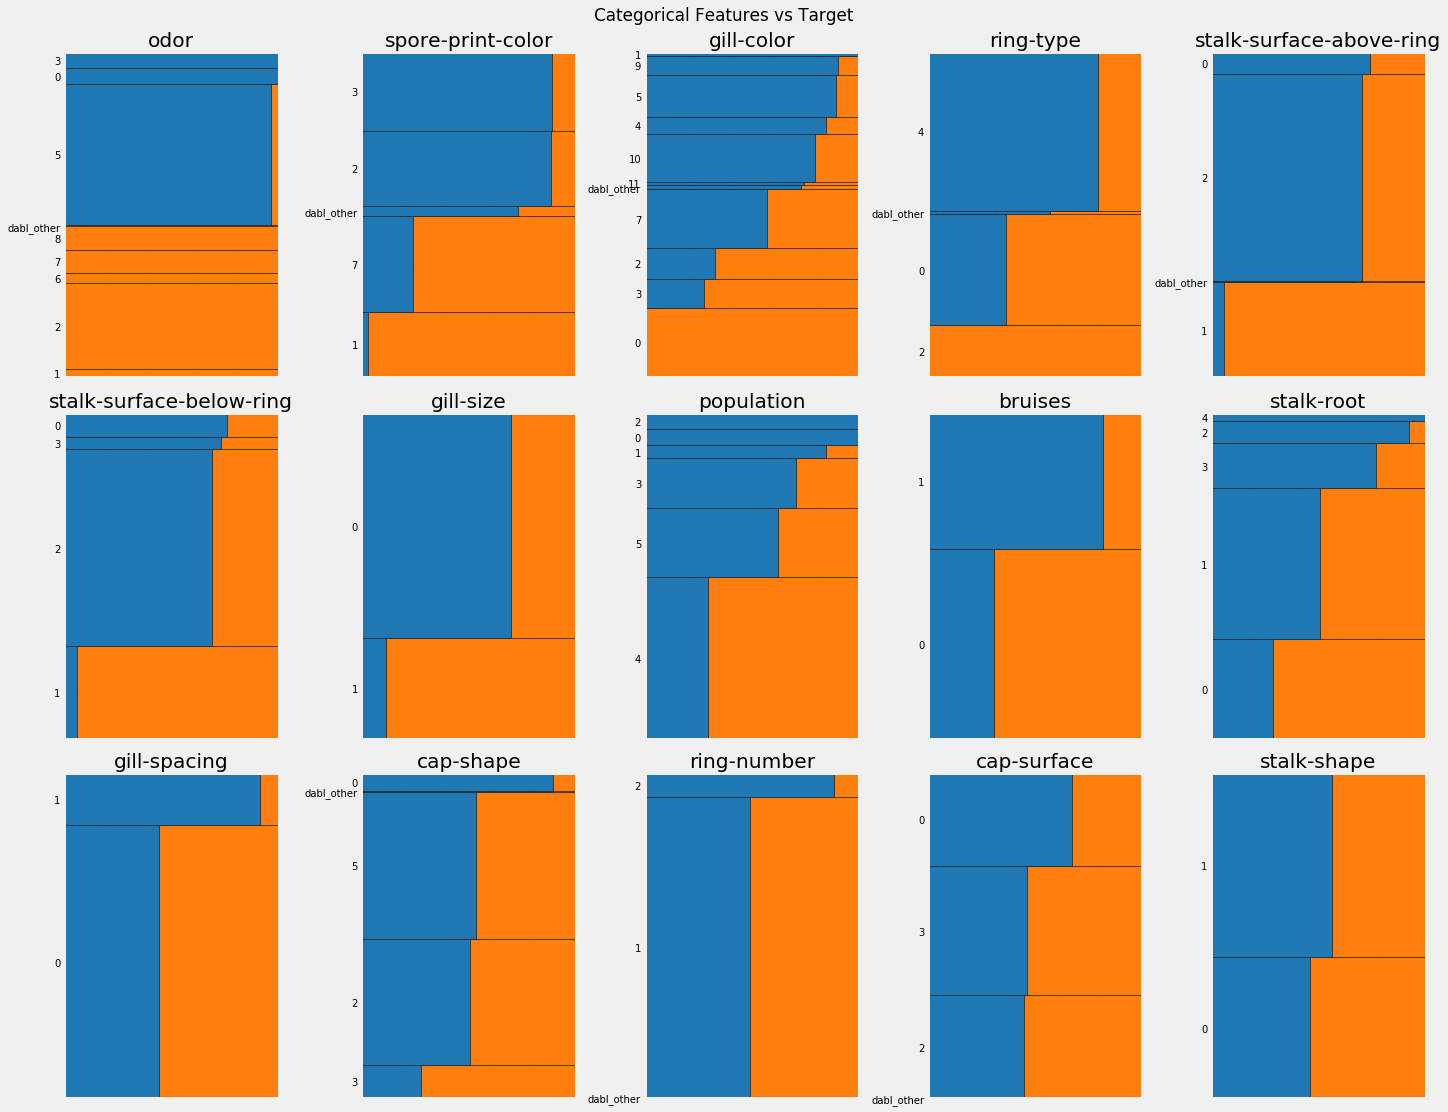

In [8]:
plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'class')

In [9]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values
X,y

(array([[5, 2, 4, ..., 2, 3, 5],
        [5, 2, 9, ..., 3, 2, 1],
        [0, 2, 8, ..., 3, 2, 3],
        ...,
        [2, 2, 4, ..., 0, 1, 2],
        [3, 3, 4, ..., 7, 4, 2],
        [5, 2, 4, ..., 4, 1, 2]]),
 array([1, 0, 0, ..., 0, 1, 0]))

In [10]:
from sklearn.preprocessing import StandardScaler

std_scale =StandardScaler()

X=std_scale.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA

pca=PCA()

pca.fit_transform(X)
print(pca.components_)

[[ 7.11067262e-03  9.91663893e-02 -1.82312637e-01 -3.07360576e-01
   2.54081078e-01  5.98063489e-02  4.87409412e-02  3.76721263e-01
  -3.70394693e-01  2.17445537e-01 -2.47609458e-01 -1.10687452e-01
  -1.34756862e-01  1.25893828e-01  1.20211943e-01 -5.16987883e-26
   5.50219333e-02  2.42256816e-02 -4.16956843e-01  3.93579139e-01
  -3.17292290e-02  1.00515410e-01]
 [ 4.11572437e-02 -1.76514190e-01  2.50719969e-01 -3.54133229e-01
  -2.39848348e-01  8.97833060e-02  2.92504638e-01 -1.40994953e-01
  -1.10138771e-01 -1.86327140e-01  1.91417349e-01 -4.29184373e-01
  -4.01825138e-01 -1.28731789e-01 -1.33667207e-01 -1.05879118e-22
   9.05680772e-02 -3.88613011e-02 -2.32367455e-01 -2.15226174e-01
  -1.79972783e-01  4.29048454e-02]
 [ 1.93707966e-02  7.92795225e-02 -9.45836122e-02 -1.59988607e-01
  -9.90576265e-02 -2.33000100e-01 -4.15809888e-01  1.36797510e-02
  -1.27987045e-01 -1.28553712e-01 -3.36963395e-01 -8.96315390e-02
  -9.19700390e-02 -4.20968370e-01 -4.17815200e-01  1.69406589e-21
  -2.2

In [12]:
pca.explained_variance_ratio_

array([1.84458684e-01, 1.23955899e-01, 1.14306801e-01, 1.03165737e-01,
       8.10867705e-02, 6.64182876e-02, 4.66039611e-02, 4.53247460e-02,
       3.66638866e-02, 3.38886068e-02, 2.74993066e-02, 2.58294323e-02,
       2.42651684e-02, 2.27216831e-02, 1.83057085e-02, 1.48185678e-02,
       1.04106068e-02, 7.59501185e-03, 6.26216657e-03, 3.48525415e-03,
       2.93371356e-03, 1.32511121e-34])

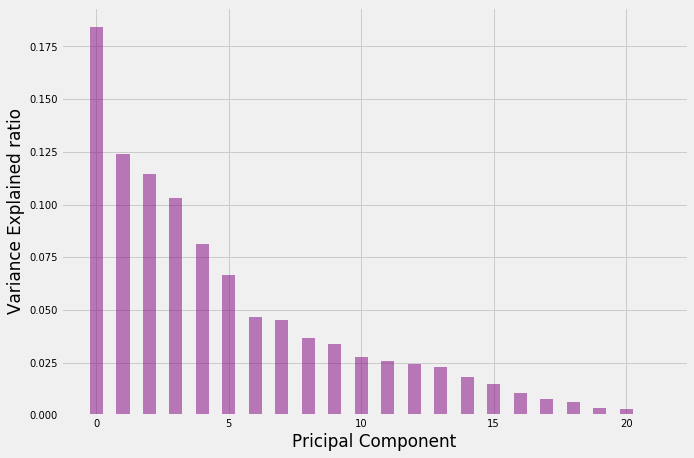

In [13]:
plt.figure(figsize=(10,7))
plt.bar(range(22),pca.explained_variance_ratio_,width=0.5,color="purple", alpha=0.5)
plt.xlabel('Pricipal Component')
plt.ylabel('Variance Explained ratio')
plt.show()

In [14]:
colors = np.array(["turquoise", "orange"])

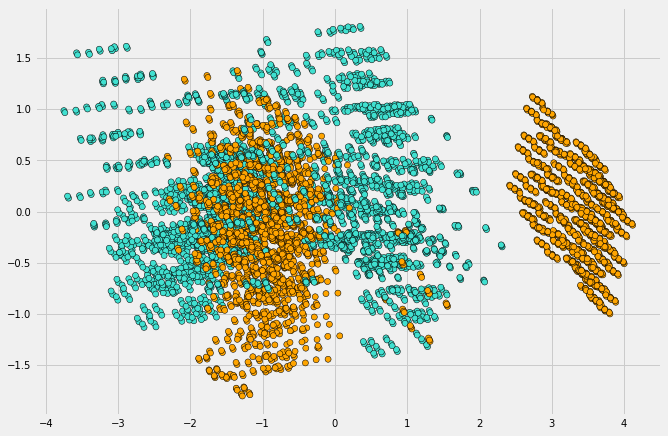

In [15]:
pca=PCA()
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:,0],X_reduced[:,15],c=colors[y],edgecolors="black")
plt.show()

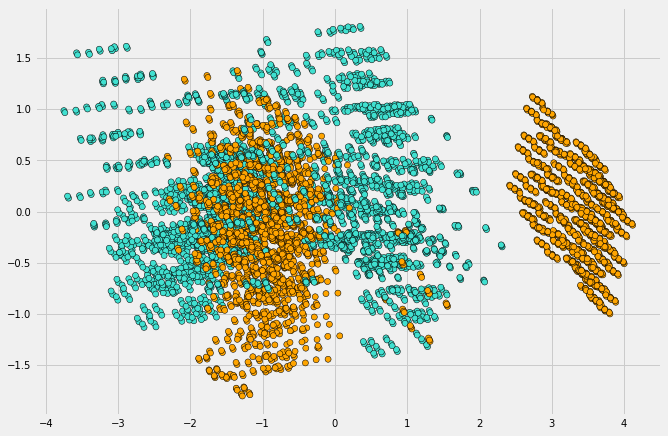

In [16]:
pca=PCA(n_components=17)
X_reduced17=pca.fit_transform(X)
plt.figure(figsize=(10,7))
plt.scatter(X_reduced17[:,0],X_reduced17[:,15],c=colors[y],edgecolors="black")
plt.show()

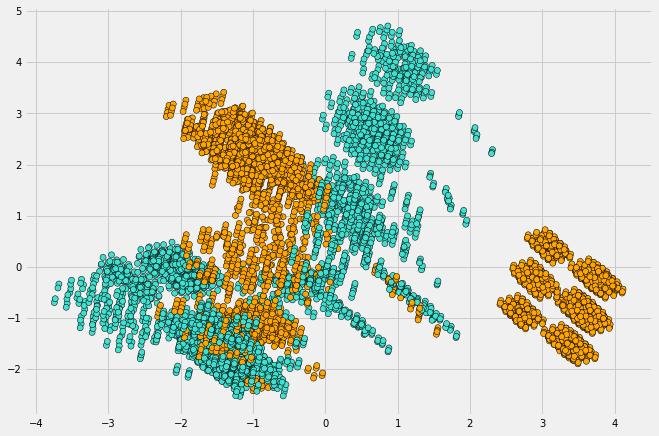

In [17]:
pca=PCA(n_components=2)
X_reduced2=pca.fit_transform(X)
plt.figure(figsize=(10,7))
plt.scatter(X_reduced2[:,0],X_reduced2[:,1],c=colors[y],edgecolors="black")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

pca=PCA()
pca17=PCA(n_components=17)
pca2=PCA(n_components=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train and test Support vector machine models

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM = SVC(C=1, kernel="poly", random_state=42)

In [20]:
SVM.fit(X_train, y_train)
y_pred1 = SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred1)))

Accuracy= 1.0


In [21]:
colors = np.array(["lime", "yellow"])

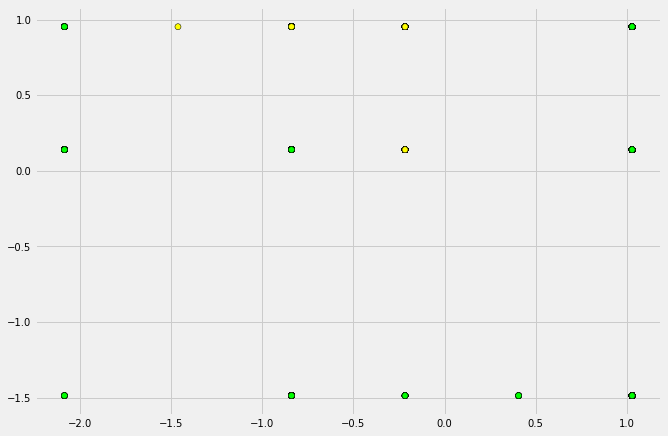

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X_test[:,0],X_test[:,1],c=colors[y_pred1],edgecolors="black")
plt.show()

### SVM with pca=PCA()

In [23]:
SVM.fit(pca.fit_transform(X_train), y_train)
y_pred = SVM.predict(pca.fit_transform(X_test))

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.5316923076923077


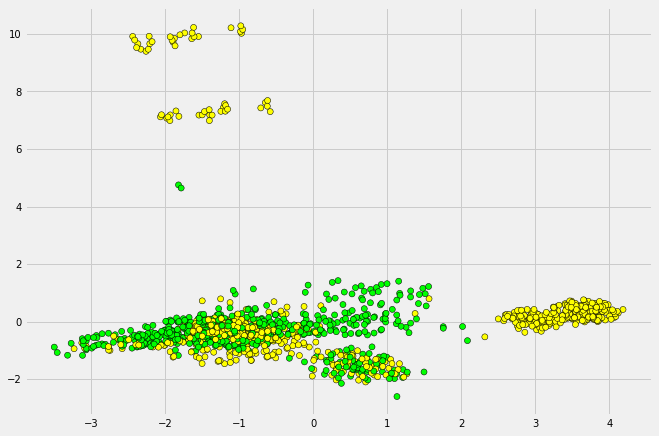

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(pca.fit_transform(X_test)[:,0],pca.fit_transform(X_test)[:,1],c=colors[y_pred],edgecolors="black")
plt.show()

### SVM with pca=PCA(n_components=2)

In [25]:
SVM.fit(pca2.fit_transform(X_train), y_train)
y_pred2 = SVM.predict(pca2.fit_transform(X_test))

print('Accuracy= ' + str(accuracy_score(y_test, y_pred2)))

Accuracy= 0.6941538461538461


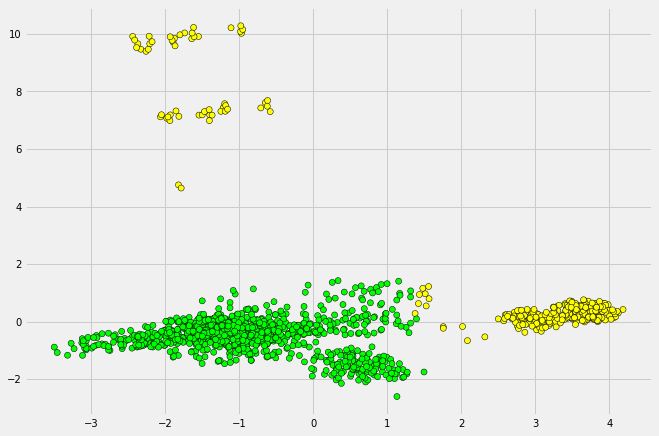

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(pca2.fit_transform(X_test)[:,0],pca2.fit_transform(X_test)[:,1],c=colors[y_pred2],edgecolors="black")
plt.show()

### SVM with pca=PCA(n_components=17)

In [27]:
SVM.fit(pca17.fit_transform(X_train), y_train)
y_pred17 = SVM.predict(pca17.fit_transform(X_test))

print('Accuracy= ' + str(accuracy_score(y_test, y_pred17)))

Accuracy= 0.5310769230769231


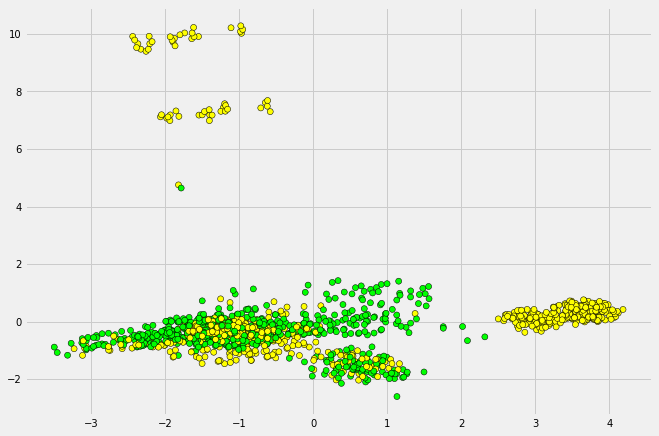

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(pca17.fit_transform(X_test)[:,0],pca17.fit_transform(X_test)[:,1],c=colors[y_pred17],edgecolors="black")
plt.show()